In [ ]:
# import libraries
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split,KFold
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import numpy as np


from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

In [ ]:
# Load the data
tensile_df =  pd.read_excel("../Tensile_Properties_Data.xlsx", header=0, skiprows=1)
tensile_df

,Reference,Material,Material Group,C (wt.%),Si (wt.%),Mn (wt.%),P (wt.%),S (wt.%),Ni (wt.%),Cr (wt.%),...,Width (mm),Aspect Ratio (L/W),Aspect Ratio (R/W),Aspect Ratio (T/W),Test Temperature (C),Strain Rate (1/s),Yield Strength (MPa),Ultimate Tensile Strength (MPa),Uniform Elongation (%),Total Elongation (%)
0,1,SS304L,"NSM, Rector Internals",0.02,0.45,1.30,NaN,NaN,8.02,18.30,...,1.2,4.166700,1.1667,0.625000,23.0,0.001000,274.0,789.0,67.00,76.00
1,1,SS304L,"NSM, Rector Internals",0.02,0.45,1.30,NaN,NaN,8.02,18.30,...,0.8,4.437500,0.3750,0.500000,23.0,0.001000,272.0,781.0,69.00,80.00
2,1,FeCrAl,"NSM, Fuel Cladding",NaN,0.13,NaN,NaN,NaN,NaN,13.10,...,1.2,4.166700,1.1667,0.416667,23.0,0.001000,710.0,767.0,7.90,14.80
3,1,FeCrAl,"NSM, Fuel Cladding",NaN,0.13,NaN,NaN,NaN,NaN,13.10,...,0.8,3.187500,0.3750,0.500000,23.0,0.001000,607.0,760.0,10.80,23.10
4,1,FeCrAl,"NSM, Fuel Cladding",NaN,0.13,NaN,NaN,NaN,NaN,13.10,...,0.8,3.187500,0.3750,0.500000,23.0,0.001000,725.0,782.0,6.60,18.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,27,SS316,SS316,0.065,0.31,1.75,0.025,0.0175,13.50,17.00,...,114.0,0.222807,NaN,0.114035,760.0,0.000067,214.0,572.0,59.35,67.66
1469,27,SS316,SS316,0.065,0.31,1.75,0.025,0.0175,13.50,17.00,...,NaN,NaN,NaN,NaN,760.0,0.000067,207.0,494.0,38.80,47.80
1470,27,SS316,SS316,0.065,0.31,1.75,0.025,0.0175,13.50,17.00,...,NaN,NaN,NaN,NaN,760.0,0.003667,101.0,352.0,31.22,47.25
1471,27,SS316,SS316,0.065,0.31,1.75,0.025,0.0175,13.50,17.00,...,25.0,2.032000,NaN,0.000000,760.0,0.000067,177.0,497.0,40.40,46.50


In [ ]:
# Check the data information for each column.
tensile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reference                        1473 non-null   int64  
 1   Material                         1473 non-null   object 
 2   Material Group                   1473 non-null   object 
 3   C (wt.%)                         1210 non-null   object 
 4   Si (wt.%)                        1174 non-null   float64
 5   Mn (wt.%)                        1179 non-null   float64
 6   P (wt.%)                         1157 non-null   float64
 7   S (wt.%)                         965 non-null    float64
 8   Ni (wt.%)                        1387 non-null   float64
 9   Cr (wt.%)                        1404 non-null   float64
 10  Mo (wt.%)                        1331 non-null   float64
 11  Al (wt.%)                        484 non-null    float64
 12  N (wt.%)            

In [ ]:
# Select the composition columns
compostion_cols = tensile_df.columns[3:29]
compostion_cols

Index(['C (wt.%)', 'Si (wt.%)', 'Mn (wt.%)', 'P (wt.%)', 'S (wt.%)',
       'Ni (wt.%)', 'Cr (wt.%)', 'Mo (wt.%)', 'Al (wt.%)', 'N (wt.%)',
       'Ti (wt.%)', 'Fe (wt.%)', 'Nb (wt.%)', 'B (wt.%)', 'Cu (wt.%)',
       'V (wt.%)', 'Mg (wt.%)', 'Y (wt.%)', 'Zr (wt.%)', 'Zn (wt.%)',
       'W (wt.%)', 'Sn (wt.%)', 'Co (wt.%)', 'O (wt.,%)', 'Ta (wt.%)',
       'H (wt.%)'],
      dtype='object')

In [ ]:
# Drop the composition columns
tensile_df = tensile_df.drop(columns=compostion_cols)

In [ ]:
# Drop other columns that are not needed
tensile_df = tensile_df.drop(columns=['Irradiation Temperature (C)',
                'Post Treatment Time (h)', 'Cooling', 'Microstructure', 'Irradiation Time (h)', 'Fillet Radius (mm)',
                'Manufacturing', 'Grain size (um)', 'Aspect Ratio (L/W)', 'Aspect Ratio (R/W)'])

In [ ]:
# value counts for which the Material Group is SS316
tensile_df[(tensile_df['Material Group'] == 'SS316') & (tensile_df['Specimen Size'] == 'Sub-sized')]

,Reference,Material,Material Group,Treatment,Treatment – Three Categories,Post Treatment Temperature (C),Irradiation Dose (mdpa),Specimen Size Type,Specimen Size,Specimen Shape,Gauge Length (mm),Thickness (mm),Width (mm),Aspect Ratio (T/W),Test Temperature (C),Strain Rate (1/s),Yield Strength (MPa),Ultimate Tensile Strength (MPa),Uniform Elongation (%),Total Elongation (%)
21,3,SS316L,SS316,Cold work,20% cold-worked,NaN,NaN,SS-1,Sub-sized,Flat,20.32,0.76,1.52,0.500000,23.0,0.00100,721.068249,822.871548,17.518529,25.259336
22,3,SS316L,SS316,Annealed at 1163k,Solution Annealed,890.0,NaN,SS-1,Sub-sized,Flat,20.32,0.76,1.52,0.500000,23.0,0.00100,544.807122,738.894121,33.687107,41.119171
23,3,SS316L,SS316,Heat treated-annealed,Heat Treatment,1050.0,NaN,SS-1,Sub-sized,Flat,20.32,0.76,1.52,0.500000,23.0,0.00100,264.391691,624.060995,67.249157,74.719795
27,3,SS316L,SS316,cold work,20% cold-worked,NaN,NaN,SS-2,Sub-sized,Flat,12.70,0.25,1.12,0.223214,23.0,0.00100,691.845905,808.066073,10.904110,13.881596
28,3,SS316L,SS316,annealed at 1163k,Heat Treatment,890.0,NaN,SS-2,Sub-sized,Flat,12.70,0.25,1.12,0.223214,23.0,0.00100,522.021494,732.729613,32.094747,34.752126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,21,SS316-C,SS316,Solution Annealed,Solution Annealed,NaN,NaN,NaN,Sub-sized,Flat,15.00,0.15,4.00,0.037500,23.0,0.00045,NaN,NaN,NaN,38.118539
986,21,SS316-C,SS316,Solution Annealed,Solution Annealed,NaN,NaN,NaN,Sub-sized,Flat,15.00,0.15,4.00,0.037500,23.0,0.00045,NaN,NaN,NaN,40.944016
987,21,SS316-C,SS316,Solution Annealed,Solution Annealed,NaN,NaN,NaN,Sub-sized,Flat,15.00,0.15,4.00,0.037500,23.0,0.00045,NaN,NaN,NaN,27.765197
988,21,SS316-C,SS316,Solution Annealed,Solution Annealed,NaN,NaN,NaN,Sub-sized,Flat,15.00,0.15,4.00,0.037500,23.0,0.00045,NaN,NaN,NaN,27.650701


In [ ]:
# value counts for which the Material Group is SS316 and shape is flat
tensile_df[(tensile_df['Material Group'] == 'SS316') & (tensile_df['Specimen Size'] == 'Sub-sized') & (tensile_df['Specimen Shape'] == 'Flat')]

,Reference,Material,Material Group,Treatment,Treatment – Three Categories,Post Treatment Temperature (C),Irradiation Dose (mdpa),Specimen Size Type,Specimen Size,Specimen Shape,Gauge Length (mm),Thickness (mm),Width (mm),Aspect Ratio (T/W),Test Temperature (C),Strain Rate (1/s),Yield Strength (MPa),Ultimate Tensile Strength (MPa),Uniform Elongation (%),Total Elongation (%)
21,3,SS316L,SS316,Cold work,20% cold-worked,NaN,NaN,SS-1,Sub-sized,Flat,20.32,0.76,1.52,0.500000,23.0,0.00100,721.068249,822.871548,17.518529,25.259336
22,3,SS316L,SS316,Annealed at 1163k,Solution Annealed,890.0,NaN,SS-1,Sub-sized,Flat,20.32,0.76,1.52,0.500000,23.0,0.00100,544.807122,738.894121,33.687107,41.119171
23,3,SS316L,SS316,Heat treated-annealed,Heat Treatment,1050.0,NaN,SS-1,Sub-sized,Flat,20.32,0.76,1.52,0.500000,23.0,0.00100,264.391691,624.060995,67.249157,74.719795
27,3,SS316L,SS316,cold work,20% cold-worked,NaN,NaN,SS-2,Sub-sized,Flat,12.70,0.25,1.12,0.223214,23.0,0.00100,691.845905,808.066073,10.904110,13.881596
28,3,SS316L,SS316,annealed at 1163k,Heat Treatment,890.0,NaN,SS-2,Sub-sized,Flat,12.70,0.25,1.12,0.223214,23.0,0.00100,522.021494,732.729613,32.094747,34.752126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,21,SS316-C,SS316,Solution Annealed,Solution Annealed,NaN,NaN,NaN,Sub-sized,Flat,15.00,0.15,4.00,0.037500,23.0,0.00045,NaN,NaN,NaN,38.118539
986,21,SS316-C,SS316,Solution Annealed,Solution Annealed,NaN,NaN,NaN,Sub-sized,Flat,15.00,0.15,4.00,0.037500,23.0,0.00045,NaN,NaN,NaN,40.944016
987,21,SS316-C,SS316,Solution Annealed,Solution Annealed,NaN,NaN,NaN,Sub-sized,Flat,15.00,0.15,4.00,0.037500,23.0,0.00045,NaN,NaN,NaN,27.765197
988,21,SS316-C,SS316,Solution Annealed,Solution Annealed,NaN,NaN,NaN,Sub-sized,Flat,15.00,0.15,4.00,0.037500,23.0,0.00045,NaN,NaN,NaN,27.650701


In [ ]:
# value counts for which the Material Group is SS316 and shape if round
tensile_df[(tensile_df['Material Group'] == 'SS316') & (tensile_df['Specimen Size'] == 'Sub-sized') & (tensile_df['Specimen Shape'] == 'Round')]

,Reference,Material,Material Group,Treatment,Treatment – Three Categories,Post Treatment Temperature (C),Irradiation Dose (mdpa),Specimen Size Type,Specimen Size,Specimen Shape,Gauge Length (mm),Thickness (mm),Width (mm),Aspect Ratio (T/W),Test Temperature (C),Strain Rate (1/s),Yield Strength (MPa),Ultimate Tensile Strength (MPa),Uniform Elongation (%),Total Elongation (%)
686,17,SS316,SS316,Solution Annealed,Solution Annealed,1050.0,NaN,HFIR-CTR rod specimen,Sub-sized,Round,18.3,2.03,2.03,1.0,23.0,0.000464,239.000000,632.000000,49.0,56.000000
687,17,SS316,SS316,Solution Annealed,Solution Annealed,1050.0,NaN,HFIR-CTR rod specimen,Sub-sized,Round,18.3,2.03,2.03,1.0,23.0,0.000464,230.000000,621.000000,51.0,59.000000
688,17,SS316,SS316,Solution Annealed,Solution Annealed,1050.0,NaN,HFIR-CTR rod specimen,Sub-sized,Round,18.3,2.03,2.03,1.0,23.0,0.000464,236.000000,623.000000,50.0,57.000000
689,17,SS316,SS316,Solution Annealed,Solution Annealed,1050.0,NaN,HFIR-CTR rod specimen,Sub-sized,Round,18.3,2.03,2.03,1.0,300.0,0.000464,165.000000,509.000000,31.0,38.000000
690,17,SS316,SS316,Solution Annealed,Solution Annealed,1050.0,NaN,HFIR-CTR rod specimen,Sub-sized,Round,18.3,2.03,2.03,1.0,300.0,0.000464,167.000000,512.000000,30.0,38.000000
691,17,SS316,SS316,Solution Annealed,Solution Annealed,1050.0,NaN,HFIR-CTR rod specimen,Sub-sized,Round,18.3,2.03,2.03,1.0,300.0,0.000464,150.000000,501.000000,30.0,38.000000
692,17,SS316,SS316,Solution Annealed,Solution Annealed,1050.0,NaN,HFIR-CTR rod specimen,Sub-sized,Round,18.3,2.03,2.03,1.0,600.0,0.000464,111.000000,504.000000,33.0,40.000000
693,17,SS316,SS316,Solution Annealed,Solution Annealed,1050.0,NaN,HFIR-CTR rod specimen,Sub-sized,Round,18.3,2.03,2.03,1.0,600.0,0.000464,113.000000,506.000000,34.0,38.000000
694,17,SS316,SS316,Solution Annealed,Solution Annealed,1050.0,NaN,HFIR-CTR rod specimen,Sub-sized,Round,18.3,2.03,2.03,1.0,600.0,0.000464,84.000000,464.000000,31.0,36.000000
695,17,SS316,SS316,20% cold-worked,20% cold-worked,1050.0,NaN,HFIR-CTR rod specimen,Sub-sized,Round,18.3,2.03,2.03,1.0,23.0,0.000464,850.000000,882.000000,11.6,20.400000


In [ ]:
# Create a new dataframe with only SS316 material
filtered_df = tensile_df[tensile_df['Material Group'] == 'SS316']

In [ ]:
# Create new column called Specimen Area
# if tensile_df['Specimen Shape'] == 'Flat', Specimen Area = Width (mm) x Thickness (mm)
# if tensile_df['Specimen Shape'] == 'Round', Specimen Area = pi x (Thickness/2)**2

import math

def calculate_area(row):
    if row['Specimen Shape'] == 'Flat':
        return row['Width (mm)'] * row['Thickness (mm)']
    elif row['Specimen Shape'] == 'Round':
        return math.pi * (row['Thickness (mm)'] / 2) ** 2
    else:
        return np.nan  # In case there is a shape that doesn't match 'Flat' or 'Round'

# Apply the function to each row in the DataFrame and create the new column
filtered_df['Specimen Area'] = filtered_df.apply(calculate_area, axis=1)

C:\Users\LZ\AppData\Local\Temp\ipykernel_5764\2449772336.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Specimen Area'] = filtered_df.apply(calculate_area, axis=1)


In [ ]:
# Create new column called Slenderness Ratio
# Slenderness Ratio = Gauge Length (mm) / sqrt(Specimen Area)
filtered_df['Slenderness Ratio'] = filtered_df['Gauge Length (mm)'] / np.sqrt(filtered_df['Specimen Area'])
# Filter the DataFrame for Slenderness Ratio values less than 50
filtered_df = filtered_df[filtered_df['Slenderness Ratio'] < 50]
# Reduce the column to two decimal places
filtered_df['Slenderness Ratio'] = filtered_df['Slenderness Ratio'].round(2)
# rename the Treatment column as Treatment1 colum
filtered_df = filtered_df.rename(columns={'Treatment': 'Treatment1'})
# rename the Treatment - Three Categories column as Treatment colum
filtered_df = filtered_df.rename(columns={'Treatment – Three Categories': 'Treatment'})
# in the Treatment column rename the entries "20% cold-worked" as "20% Cold Worked"
filtered_df ['Treatment'] = filtered_df['Treatment'].replace('20% cold-worked', '20% Cold Worked')

C:\Users\LZ\AppData\Local\Temp\ipykernel_5764\639529246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Slenderness Ratio'] = filtered_df['Gauge Length (mm)'] / np.sqrt(filtered_df['Specimen Area'])


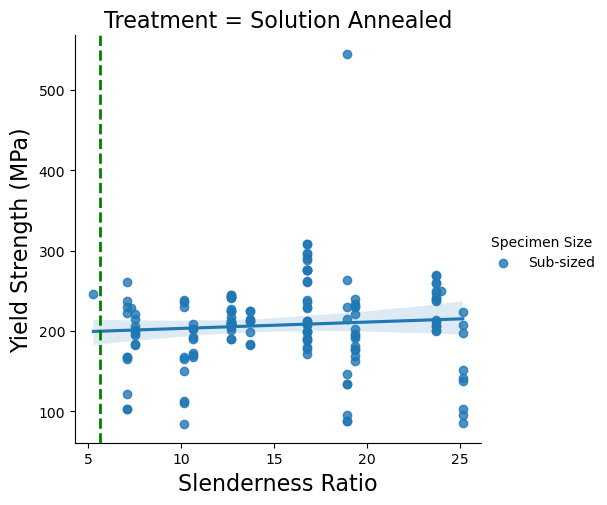

In [ ]:
# plot yield strength box plots based on slenderness ratio by treatment, create three subplots based on treatment
# Order the plots for the treatment: 20% colde worked on the right
g = sns.lmplot(x='Slenderness Ratio', y='Yield Strength (MPa)', hue='Specimen Size', col='Treatment', data=filtered_df[filtered_df['Specimen Size']=='Sub-sized'],
            palette='tab10', legend=True,  col_order=['Solution Annealed'])
for ax in g.axes.flat:
     ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
     ax.set_xlabel('Slenderness Ratio', fontsize=16)
     ax.set_ylabel('Yield Strength (MPa)', fontsize=16)
     ax.set_title(ax.get_title(), fontsize=16)

     # Add a vertical line at x = 5.65
     ax.axvline(x=5.65, color='green', linestyle='--', linewidth=2)

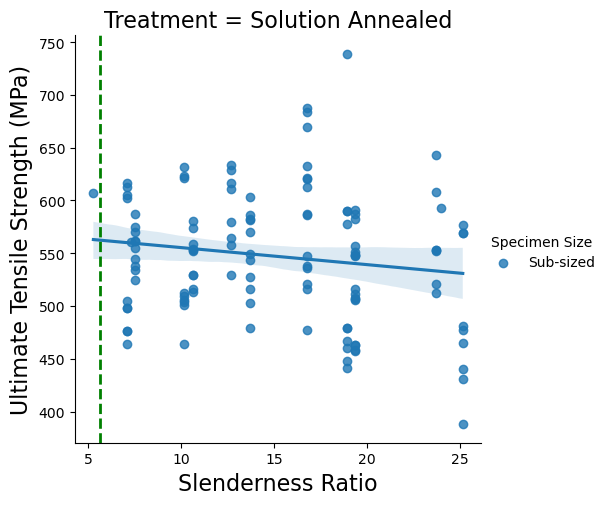

In [ ]:
# plot yield strength box plots based on slenderness ratio by treatment, create three subplots based on treatment
# Order the plots for the treatment: 20% colde worked on the right
g = sns.lmplot(x='Slenderness Ratio', y='Ultimate Tensile Strength (MPa)', hue='Specimen Size', col='Treatment', data=filtered_df[filtered_df['Specimen Size']=='Sub-sized'],
            palette='tab10', legend=True,  col_order=['Solution Annealed'])
for ax in g.axes.flat:
     ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
     ax.set_xlabel('Slenderness Ratio', fontsize=16)
     ax.set_ylabel('Ultimate Tensile Strength (MPa)', fontsize=16)
     ax.set_title(ax.get_title(), fontsize=16)
     # Add a vertical line at x = 5.65
     ax.axvline(x=5.65, color='green', linestyle='--', linewidth=2)

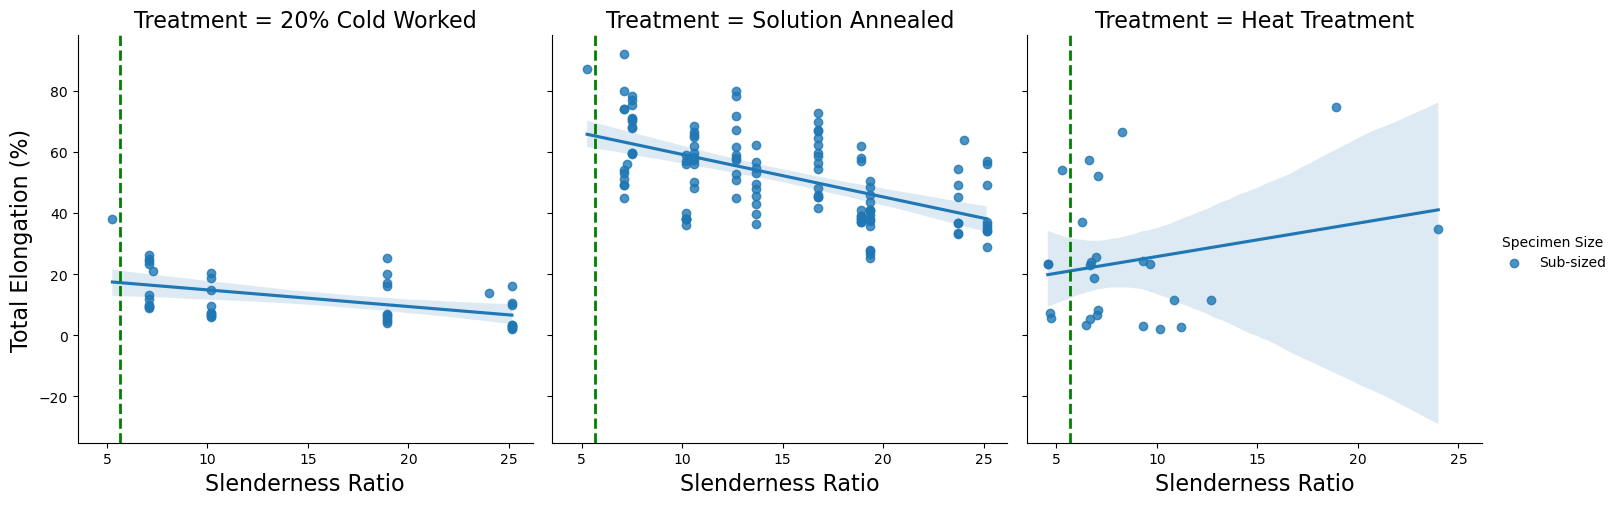

In [ ]:
# plot yield strength box plots based on slenderness ratio by treatment, create three subplots based on treatment
# Order the plots for the treatment: 20% colde worked on the right
g = sns.lmplot(x='Slenderness Ratio', y='Total Elongation (%)', hue='Specimen Size', col='Treatment', data=filtered_df[filtered_df['Specimen Size']=='Sub-sized'],
            palette='tab10', legend=True,  col_order=['20% Cold Worked', 'Solution Annealed', 'Heat Treatment'])
for ax in g.axes.flat:
     ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
     ax.set_xlabel('Slenderness Ratio', fontsize=16)
     ax.set_ylabel('Total Elongation (%)', fontsize=16)
     ax.set_title(ax.get_title(), fontsize=16)
     # Add a vertical line at x = 5.65
     ax.axvline(x=5.65, color='green', linestyle='--', linewidth=2)

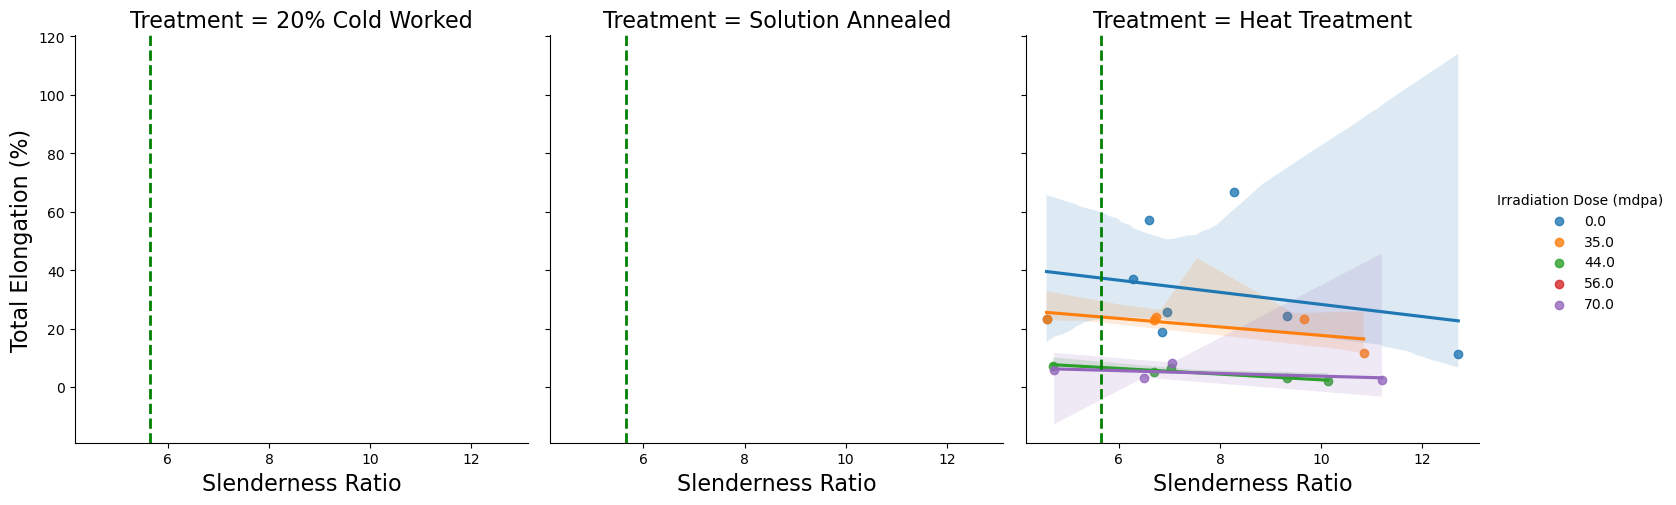

In [ ]:
# plot yield strength box plots based on slenderness ratio by treatment, create three subplots based on treatment
# Order the plots for the treatment: 20% colde worked on the right
g = sns.lmplot(x='Slenderness Ratio', y='Total Elongation (%)', hue='Irradiation Dose (mdpa)', col='Treatment', data=filtered_df[filtered_df['Specimen Size']=='Sub-sized'],
            palette='tab10', legend=True,  col_order=['20% Cold Worked', 'Solution Annealed', 'Heat Treatment'])
for ax in g.axes.flat:
     ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
     ax.set_xlabel('Slenderness Ratio', fontsize=16)
     ax.set_ylabel('Total Elongation (%)', fontsize=16)
     ax.set_title(ax.get_title(), fontsize=16)
     # Add a vertical line at x = 5.65
     ax.axvline(x=5.65, color='green', linestyle='--', linewidth=2)

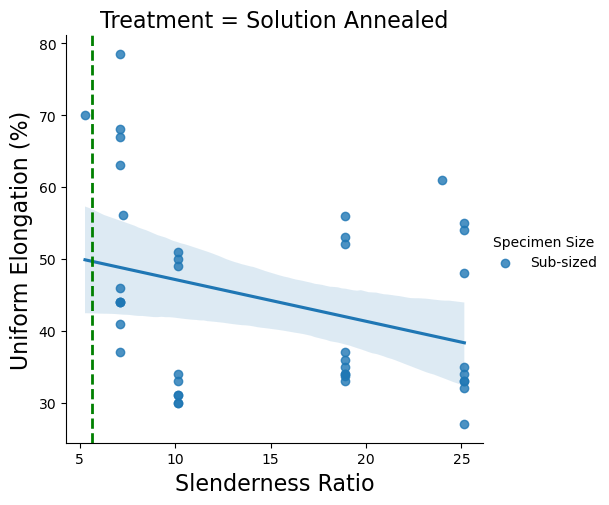

In [ ]:
# plot yield strength box plots based on slenderness ratio by treatment, create three subplots based on treatment
# Order the plots for the treatment: 20% colde worked on the right
g = sns.lmplot(x='Slenderness Ratio', y='Uniform Elongation (%)', hue='Specimen Size', col='Treatment', data=filtered_df[filtered_df['Specimen Size']=='Sub-sized'],
            palette='tab10', legend=True,  col_order=['Solution Annealed'])
for ax in g.axes.flat:
     ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
     ax.set_xlabel('Slenderness Ratio', fontsize=16)
     ax.set_ylabel('Uniform Elongation (%)', fontsize=16)
     ax.set_title(ax.get_title(), fontsize=16)
     # Add a vertical line at x = 5.65
     ax.axvline(x=5.65, color='green', linestyle='--', linewidth=2)